In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from operator import attrgetter
import scipy.stats as st
import matplotlib.ticker as mtick

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

In [3]:
# проверяем на наличие Null в строках
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [4]:
# смотрим общую информацию датасета 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# проверяем на наличие Null в строках
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [6]:
# смотрим общую информацию датасета 
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
# переводим колонку "shipping_limit_date" в тип времени
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [8]:
# проверяем корректно ли сработала команда
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [9]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# переводим тип нужных колонок в тип времени и даты
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [13]:
# проверяем корректно ли сработала команда
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [14]:
# проверяем корректно ли сработала команда
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


## Задача 1. 
Оценить месячный retention в оформление заказа с помощью когортного анализа.

In [15]:
# объединяем все датасеты для дальнейшей работы
full_df = orders.merge(customers, on = 'customer_id')
full_df = full_df.merge(order_items, on = 'order_id')

In [16]:
full_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [17]:
# создаем копию датасета
retention = full_df[['order_id', 'customer_unique_id', 'order_status','order_purchase_timestamp']]

In [18]:
# поскольку для анализа нам нужен полноценный пользовательский опыт, то фильтруем клиентов, которые получили свои заказы
retention = retention.query("order_status == 'delivered'")

In [19]:
# создаем точки отчета для дальнейших расчетов
retention['transaction_period'] = retention['order_purchase_timestamp'].dt.to_period('M')
retention['transaction_day'] = retention['order_purchase_timestamp'].dt.to_period('D')

In [20]:
# рассчитываем  0  когорту для каждого пользователя
retention['cohort'] = retention.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
retention['cohort_day'] = retention.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [21]:
retention

,order_id,customer_unique_id,order_status,order_purchase_timestamp,transaction_period,transaction_day,cohort,cohort_day
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13
...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:58,2018-02,2018-02-06,2018-02,2018-02-06
112646,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:43,2017-08,2017-08-27,2017-08,2017-08-27
112647,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08
112648,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08


In [22]:
retention['period_number_month'] = np.floor((retention.transaction_day-retention.cohort_day).apply(attrgetter('n'))/30)

In [23]:
retention_cohort = retention.groupby(['cohort', 'period_number_month'], as_index = False).agg(n_customers =('customer_unique_id', 'nunique'))

In [24]:
retention_cohort = retention_cohort.pivot_table(index = 'cohort', columns = 'period_number_month', values = 'n_customers')

In [25]:
retention_cohort

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
retention_matrix = retention_cohort.divide(retention_cohort[0], axis = 0).round(4)

In [27]:
# вычисляем медианный retention 1-го месяца
first_month_median = retention_matrix[1].median()
print(f'Медиана retention 1-го месяца равняется {first_month_median}')

Медиана retention 1-го месяца равняется 0.0035


In [28]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.0038,NaN,NaN,0.0038,...,0.0038,NaN,0.0038,NaN,0.0038,NaN,0.0038,0.0076,0.0038,0.0038
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.0028,NaN,0.0056,0.0014,0.0014,0.0028,0.0028,NaN,NaN,...,0.0056,0.0042,0.0028,NaN,0.0028,0.0028,0.0028,0.0014,NaN,NaN
2017-02,1.0,0.0012,0.0018,0.0037,0.0025,0.0012,0.0025,0.0006,0.0012,0.0025,...,0.0037,0.0006,0.0018,0.0012,0.0006,0.0006,0.0018,NaN,NaN,NaN
2017-03,1.0,0.0028,0.0052,0.0044,0.0012,0.0008,0.0036,0.0016,0.0024,0.0024,...,0.0016,0.0016,0.0012,0.0028,0.0008,0.0012,0.0008,NaN,NaN,NaN
2017-04,1.0,0.0035,0.0027,0.0004,0.0027,0.0035,0.0027,0.0044,0.0022,0.0027,...,0.0013,NaN,0.0009,0.0009,0.0009,0.0009,NaN,NaN,NaN,NaN
2017-05,1.0,0.0041,0.0041,0.0023,0.0038,0.0032,0.0032,0.0012,0.0029,0.0026,...,0.0032,0.0017,0.0009,0.0020,0.0012,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.0043,0.0049,0.0036,0.0016,0.0053,0.0030,0.0020,0.0013,0.0033,...,0.0030,0.0010,0.0030,0.0013,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# вычисляем когорту с самым высоким retention на 3-й месяц
max_cohort_third_month = retention_matrix[3].idxmax()
print(f'Когорта с самым высоким retention на 3-й месяц приходится на {max_cohort_third_month}')

Когорта с самым высоким retention на 3-й месяц приходится на 2017-01


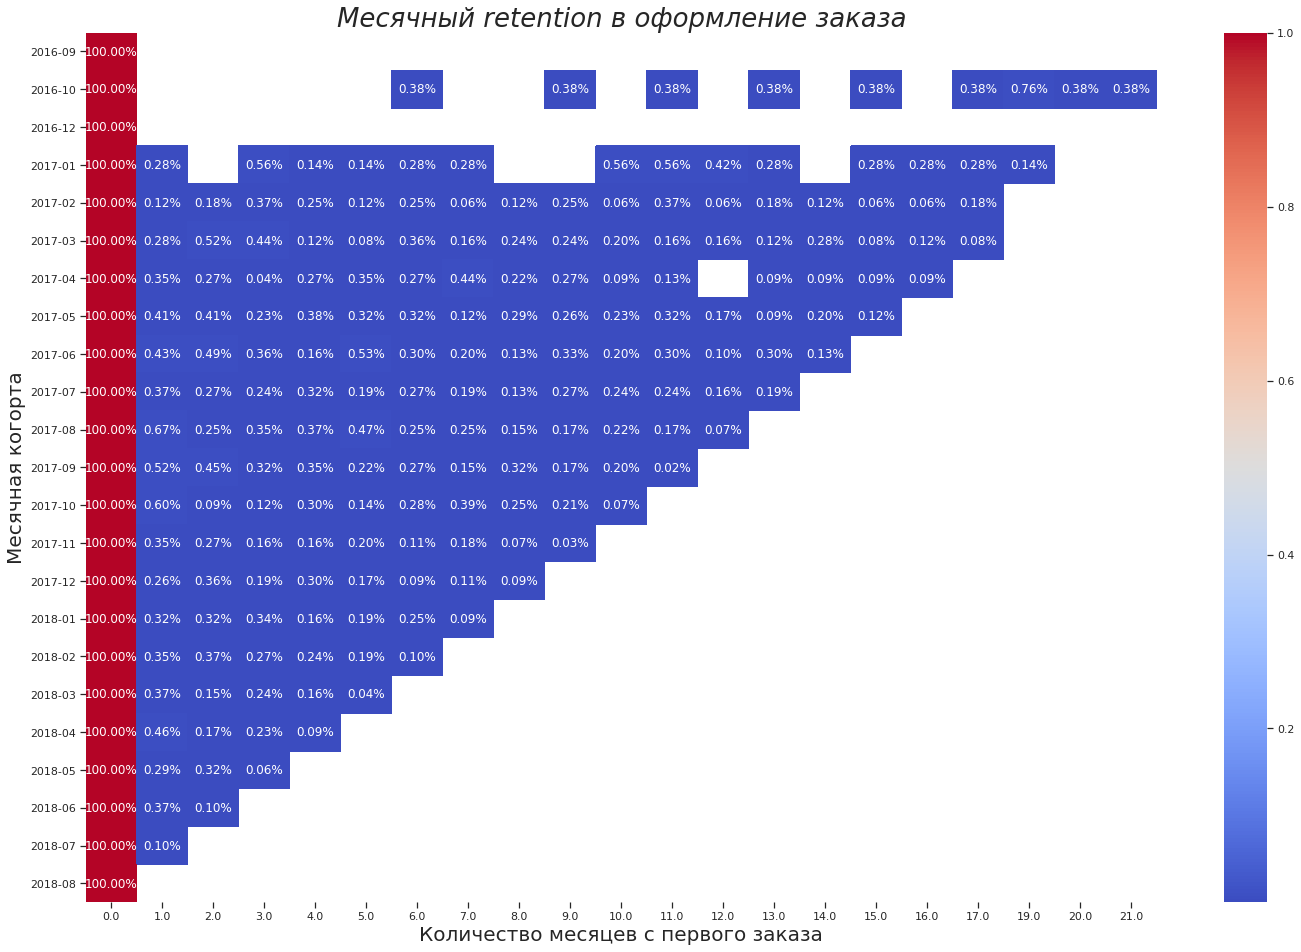

In [30]:
plt.figure(figsize=(24,16))
sns.set(style='ticks')
sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.2%', cmap='coolwarm', cbar=True)
plt.title('Месячный retention в оформление заказа', fontsize=26, fontstyle = 'italic')
plt.ylabel('Месячная когорта', fontsize = 20)
plt.xlabel('Количество месяцев с первого заказа', fontsize = 20)
plt.show()

## Задача 2. 

***Определить, существует ли product/market fit у маркетплейса***.

*Исходя из результатов когортного анализа, уровень удержания клиентов составляет менее 1%, что свидетельствует о крайне низкой вовлеченности и повторных покупках. Это указывает на **отсутствие Product/Market Fit** на текущем этапе развития маркетплейса.*

*Поскольку в когортный анализ включены только те клиенты, которые действительно получили свои заказы, одной из возможных причин столь высокого оттока может быть негативный пользовательский опыт на этапе обработки заказа.*

In [31]:
# создаем df для дальнейшей обработки
pmf_df = full_df[['order_id', 'order_item_id', 'customer_unique_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

In [32]:
# выводим количество строк для дальнейшего сравнения фильтрации
pmf_df.shape

(112650, 9)

In [33]:
# применяем фильтрацию
# в расчет берем только тех клиентов, которые успешно прошли весь пользовательский опыт
pmf_df = pmf_df.query("order_status == 'delivered'")

In [34]:
# выводим количество строк для проверки применимой фильтрации
pmf_df.shape

(110197, 9)

*Для начала проанализируем среднее время, затрачиваемое на подтверждение заказа.*

In [35]:
# создаем колонку с количеством времени, затрачиваемого на подтверждение заказа
pmf_df['approval_time'] = pmf_df['order_approved_at']-pmf_df['order_purchase_timestamp']
# переводим в часы, чтобы проверить среднее время по месяцам
pmf_df['approval_time_hours'] = pmf_df['approval_time'].dt.total_seconds() / 3600

In [36]:
# смотрим общее среднее время, затрачиваемого на подтверждение заказа, по всему дата фрейму
pmf_df['approval_time'].mean()

Timedelta('0 days 10:31:05.509983481')

*Среднее время, необходимое для подтверждения заказов, составляет **10,5 часов**, что в современных условиях можно считать чрезмерно долгим. Продолжительная обработка покупки может вызывать у пользователей ощущение неопределенности, что, в свою очередь, приводит к снижению доверия к платформе. В результате негативный клиентский опыт отрицательно влияет на воспринимаемую ценность маркетплейса и делает его менее конкурентоспособным.*

In [37]:
# создаем колонку с месяцами для дальнейшей группировки
pmf_df['transaction_period'] = (pmf_df['order_purchase_timestamp'].dt.to_period('M'))

In [38]:
# проверила среднее время, затраченное на подтверждение заказа по месяцам
# нужно, чтобы увидеть были ли какие-либо аномальные скачки
# видно, что среднее время обработки заказа сохраняется
monthly_avg_time = pmf_df.groupby('transaction_period', as_index =  False).agg(avg_hours=('approval_time_hours', 'mean')).round(2)

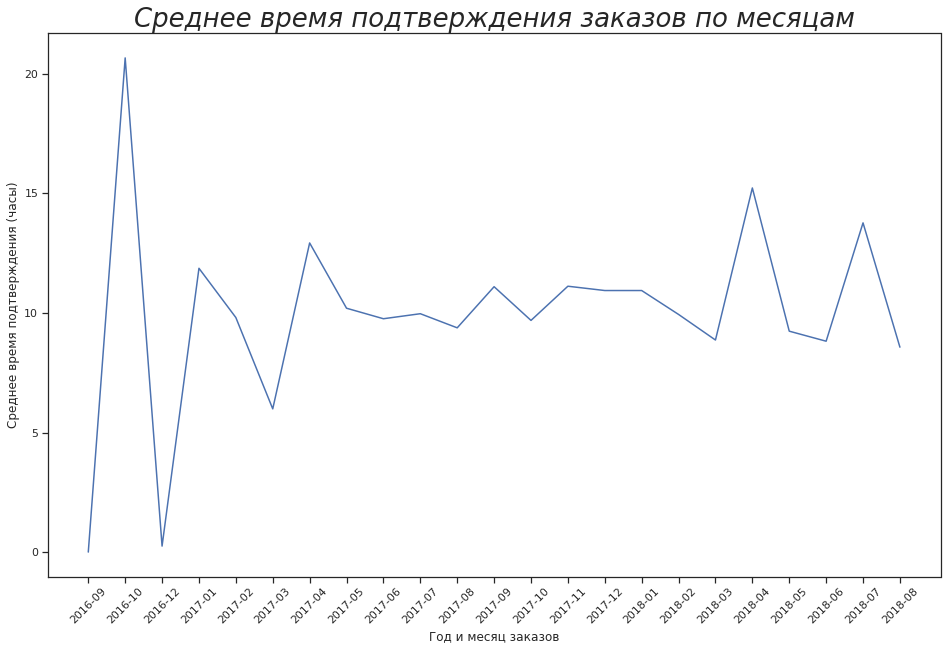

In [39]:
plt.figure(figsize=(16,10))
sns.lineplot(x = monthly_avg_time.transaction_period.astype(str), y = monthly_avg_time.avg_hours)
plt.title('Среднее время подтверждения заказов по месяцам', fontsize=26, fontstyle = 'italic')
plt.xlabel('Год и месяц заказов')
plt.ylabel('Среднее время подтверждения (часы)')
plt.xticks(rotation=45)
plt.show()

*Из графика видно, что среднее время подтверждения заказов остаётся устойчиво высоким на протяжении всего периода наблюдения, за исключением двух месяцев — сентября и декабря 2016 года. Этот факт свидетельствует об отсутствии аномальных скачков и выбросов.*

*Исходя из имеющихся данных, попробуем определить причины в задержке обработки заказа*

In [40]:
# проверяем изменяется ли затрачиваемое время на подтверждение от количества заказа
product_num_time = pmf_df.groupby('order_id', as_index = False) \
                    .agg(num_of_items = ('order_item_id','count'),
                         avg_time = ('approval_time_hours', 'mean')) \
                    .sort_values('num_of_items', ascending = False)

In [41]:
product_num_time=product_num_time.loc[product_num_time['avg_time'].notna()]

In [42]:
st.pearsonr(product_num_time.num_of_items, product_num_time['avg_time'])

(0.024922039979821384, 9.821034704474029e-15)

In [43]:
product_num_time['avg_time'] = pd.to_timedelta(product_num_time['avg_time'], unit='h')

*Корреляционный анализ по методу Пирсона выявил статистически значимую, но крайне слабую связь между количеством товаров в заказе и временем, необходимым для его подтверждения (коэффициент корреляции = 0.024).
Это означает, что увеличение числа товаров в заказе практически не влияет на продолжительность обработки, и, следовательно, данный фактор вряд ли может объяснять общее замедление подтверждения заказов.*

In [44]:
# проверяем гипотезу о том, что задержка подтверждения заказа связана с тем, что заказы обрабатываются вручную в "рабочее время"
pmf_df['purchase_hour'] = pmf_df['order_purchase_timestamp'].dt.hour
pmf_df['approval_hour'] = pmf_df['order_approved_at'].dt.hour

In [45]:
pmf_df['purchase_hour'].value_counts().sort_index()

0     2655
1     1264
2      575
3      299
4      242
5      213
6      533
7     1343
8     3337
9     5346
10    6881
11    7272
12    6661
13    7224
14    7415
15    7214
16    7479
17    6839
18    6390
19    6577
20    6733
21    6757
22    6399
23    4549
Name: purchase_hour, dtype: int64

In [46]:
pmf_df['approval_hour'].value_counts().sort_index()

0.0     2186
1.0     1699
2.0     8089
3.0     6252
4.0     3762
5.0     1179
6.0     1035
7.0     1676
8.0     2506
9.0     4195
10.0    5334
11.0    5873
12.0    5082
13.0    6110
14.0    5980
15.0    5871
16.0    6607
17.0    6065
18.0    5545
19.0    5541
20.0    5367
21.0    5149
22.0    5200
23.0    3879
Name: approval_hour, dtype: int64

*Предположение о том, что задержка подтверждения заказов может быть связана с ограничением обработки только в рабочие часы операторов, не подтвердилось — заказы обрабатываются круглосуточно.
Это позволяет предположить, что причина высокой продолжительности подтверждения заказов может заключаться в недостаточной автоматизации данного процесса.*

Помимо продолжительного процесса подтверждения заказа, существуют и другие этапы обработки, на которых клиент мог столкнуться с негативным пользовательским опытом.
В частности, проанализируем, были ли случаи опоздания доставки по сравнению с заявленной предполагаемой датой.

In [47]:
# высчитываем разницу между предполагаемой датой доставки и фактической
pmf_df['diff_est_delivery'] = pmf_df['order_estimated_delivery_date'] - pmf_df['order_delivered_customer_date']

In [48]:
pmf_df.shape

(110197, 15)

In [49]:
# избавляемся от дубликатов в order_id
deliveries = pmf_df.drop_duplicates(subset = 'order_id', keep = 'first')

In [50]:
# проверяем удалились ли дубликаты
deliveries['order_id'].value_counts().reset_index().sort_values('order_id', ascending=False)

,index,order_id
0,9d6f2f3cd249678b19ac473c2e38bee9,1
64315,c2a9913d397112443fdd3676baea3e98,1
64324,534100b99398bfa0b9ffbf40fc8c7757,1
64323,8ac8caf128f503ff9cf86d1838fcd2ec,1
64322,d22cef32310bb1950b78612b7c15ae9a,1
...,...,...
32157,82daccb8bfc3bb76bc1616a4f22c3cb1,1
32156,8076239f377d73802255196d49b6fcda,1
32155,7a5941b80b56b7d80e8e695e1c88eed4,1
32154,dfa82c0d8cadaa36975ca3f856251e6c,1


In [51]:
# считаем среднее время доставки
deliveries['diff_est_delivery'].mean()
# в среднем товары доставлялись раньше, чем это было заявлено

Timedelta('11 days 04:16:30.062972945')

In [52]:
late_deliveries = deliveries.query("order_delivered_customer_date>order_estimated_delivery_date	")

In [53]:
# высчитываем долю опозданий от всех созданных заказов
late_deliveries.shape[0]/deliveries.shape[0]

0.08111693857667032

In [54]:
deliveries['is_late'] = deliveries.apply(lambda x: 'late' if x['order_delivered_customer_date'] > x['order_estimated_delivery_date'] else 'not_late', axis =1)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
deliveries.query("is_late == 'late'")

,order_id,order_item_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time,approval_time_hours,transaction_period,purchase_hour,approval_hour,diff_est_delivery,is_late
21,203096f03d82e0dffbc41ebc2e2bcfb7,1,d699688533772c15a061e8ce81cb56df,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,0 days 13:32:39,13.544167,2017-09,14,4.0,-12 days +01:36:14,late
26,fbf9ac61453ac646ce8ad9783d7d0af6,1,a25d5f94840d3c6a1a49f271ed83f4ec,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,1 days 02:43:53,26.731389,2018-02,23,2.0,-10 days +01:56:06,late
37,8563039e855156e48fccee4d611a3196,1,92fd8aa5948e20c43a014c44c025c5e1,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,0 days 00:15:48,0.263333,2018-02,15,16.0,-1 days +23:00:35,late
43,6ea2f835b4556291ffdc53fa0b3b95e8,1,3e4fd73f1e86b135b9b121d6abbe9597,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,0 days 02:53:21,2.889167,2017-11,21,0.0,-8 days +05:00:37,late
60,66e4624ae69e7dc89bd50222b59f581f,1,ddf60e20e6e262e2136801ce5cd628b0,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,0 days 00:50:24,0.840000,2018-03,14,15.0,-2 days +10:31:14,late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112602,b3112ca67f3afd4e20cf2ee91fc4f804,1,f690f0caffab80b6f849f08ba1692925,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,0 days 00:17:12,0.286667,2018-08,22,23.0,-6 days +23:56:34,late
112604,0fa1fab1d7c1211c824596ed5e111e3c,1,4b855cb19adce3763ce1af3acc2aae0b,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,0 days 00:51:31,0.858611,2018-03,21,22.0,-4 days +04:00:11,late
112630,38e9133ce29f6bbe35aed9c3863dce01,1,a3983b8b6b679c9f645e6ef9517ac98d,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,1 days 06:34:13,30.570278,2017-10,20,3.0,-22 days +06:53:01,late
112632,d692ef54145c9cb3322ec2e5508aa3f4,1,397cd1affbb66fa8f76e8ac24685440a,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,0 days 00:18:08,0.302222,2018-03,19,20.0,-3 days +23:11:29,late


In [56]:
deliveries.query("is_late == 'late'")['diff_est_delivery'].mean()

Timedelta('-10 days +10:45:26.560695119')

In [57]:
late = deliveries['is_late'].value_counts()

In [58]:
late

not_late    88652
late         7826
Name: is_late, dtype: int64

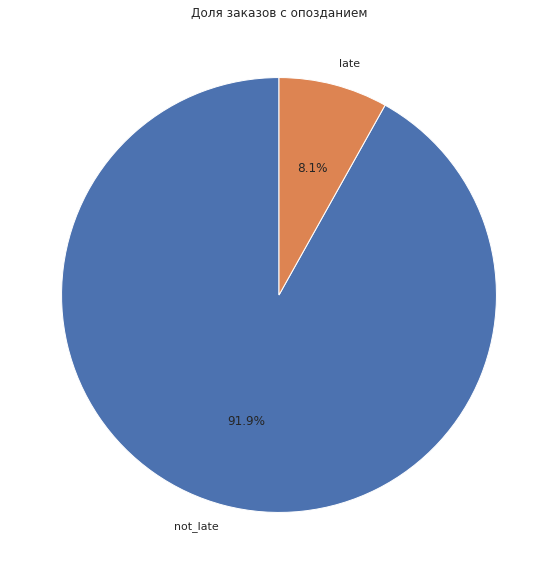

In [59]:
plt.figure(figsize=(10, 10))
plt.pie(late, labels=late.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля заказов с опозданием')
plt.show()

В большинстве случаев доставка осуществлялась раньше заявленного срока — в среднем на 11 дней.
Доля заказов с опозданием составила всего 8.1%, однако среднее время задержки составляет 10 дней, что является критическим показателем

Проанализируем среднее время доставки.

In [60]:
pmf_df['delivery_time'] = pmf_df['order_delivered_customer_date']-pmf_df['order_approved_at']

In [61]:
pmf_df['delivery_time'].mean()

Timedelta('12 days 00:48:45.224018370')

*Среднее время доставки заказов внутри Бразилии составляет более 12 дней, что является достаточно долгим сроком. А это, в свою очередь, негативно влияет на удовлетворённость клиентов от пользования маркетплейсом.*

### Выводы:
Возможными причинами отсутствия Product/Market Fit является негативный пользовательский опыт. В среднем подтверждение заказа занимает 10,5 часов, а доставка по стране — более 11 дней. Эти факторы могут приводить к снижаению удовлетворённости клиентов маркетплейсом, уменьшению воспринимаемой ценности платформы и затруднению формирования лояльной клиентской базы.

## Задача 3. Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

Вы разобрались с наличием product/market fit. Теперь вас просят сформулировать продуктовые метрики маркетплейса, чтобы компания могла на них ориентироваться.

В первую очередь необходимо:

Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

- **Первая** метрика должна отражать рост объёма продаж маркетплейса.
- **Вторая** — показывать объем аудитории, которой продукт доставляет ценность.
- **Третья** — отражать заинтересованность новых клиентов в продукте (даже если вы не можете посчитать ее на имеющихся у вас данных).
- **Четвёртая** — отражать вовлеченность клиента в продолжение использования продукта.
- **Пятая** — отражать денежное выражение вовлеченности клиента.

In [62]:
full_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


### 1. Метрика роста объема продаж

In [63]:
# Мы исключаем отмененные заказы, поскольку выручку приносят только доставленные
# Группируем по месяам, чтобы можно было отследить рост объема продаж
monthly_gmv = full_df.query("order_status == 'delivered'") \
                     .groupby(full_df['order_purchase_timestamp'].dt.to_period('M'))['price'].sum() \
                     .reset_index()

In [64]:
monthly_gmv

,order_purchase_timestamp,price
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40
5,2017-03,359198.85
6,2017-04,340669.68
7,2017-05,489338.25
8,2017-06,421923.37
9,2017-07,481604.52


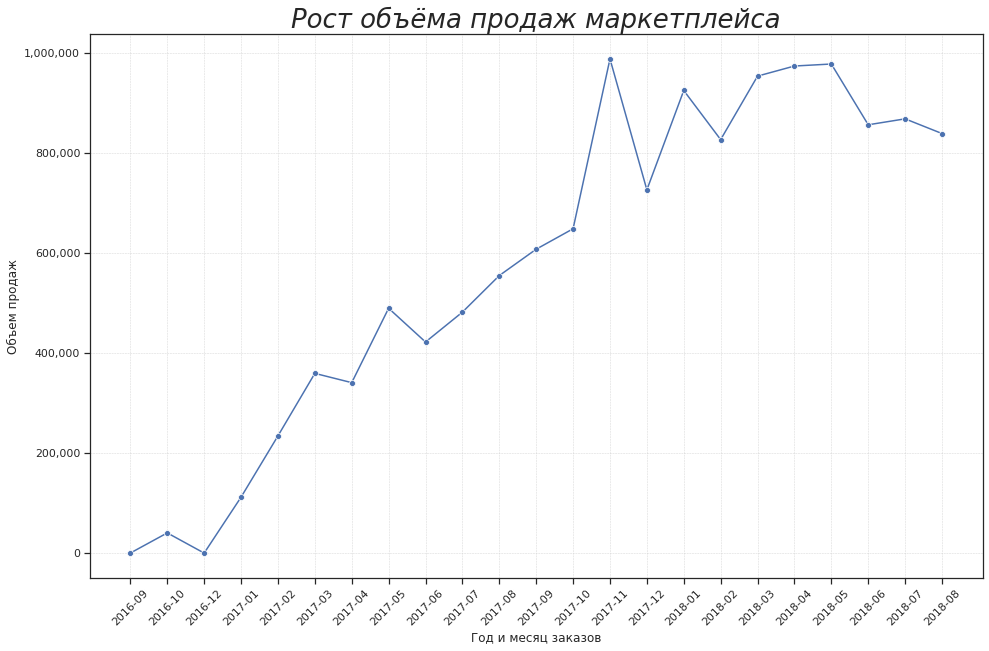

In [65]:
# строим график, чтобы отследить динамику роста объема продаж
plt.figure(figsize=(16,10))
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.8)
gmv_graph = sns.lineplot(x = monthly_gmv.order_purchase_timestamp.astype(str), y = monthly_gmv.price, marker='o')
plt.xticks(rotation=45)
plt.title('Рост объёма продаж маркетплейса', fontsize=26, fontstyle = 'italic')
plt.xlabel('Год и месяц заказов')
plt.ylabel('Объем продаж')
gmv_graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))


Из графика видим, что в целом объем продаж растет, однако динамика на протяжении всего периода не стабильна - наблюдаются как резкие скачки (например, с декабря 2016 года объем продаж с 10 увеличился до 111тыс.), так и значительные падения (после ноября 2017 года объемы продаж резко упали с 987 тыс. до 726 тыс.)

### 2. Метрика объема аудитории, которой продукт доставляет ценность

In [66]:
full_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [67]:
# Оценить ценность продукта мы можем через клиентов, которые совершали более 1 заказа
success_customers  = full_df.query("order_status=='delivered'")[['customer_unique_id','order_id']]

In [68]:
success_customers = success_customers.groupby('customer_unique_id', as_index = False) \
                           .agg(num_of_orders = ('order_id', 'nunique'))

In [69]:
repeat_ratio = round(((success_customers.query('num_of_orders > 1').shape[0]) /success_customers.shape[0]),2)
print(f'Доля клиентов, которые совершили повторный заказ составляет {repeat_ratio*100}%')

Доля клиентов, которые совершили повторный заказ составляет 3.0%


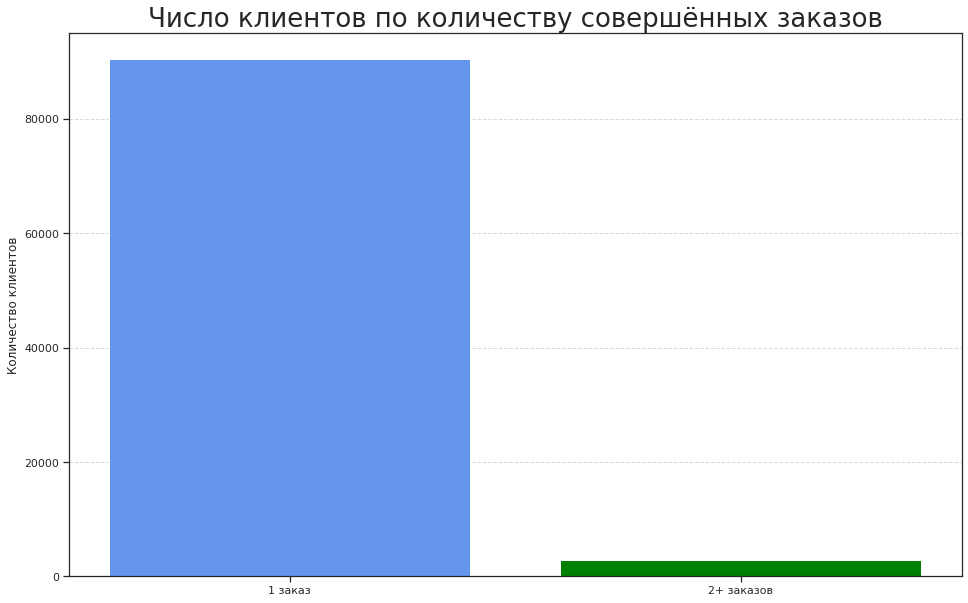

In [70]:
# строим график: Клиенты, совершившие один заказ, против Клиентов, совершивших 2 и более покупок
once = (success_customers['num_of_orders'] == 1).sum()
repeat = (success_customers['num_of_orders'] > 1).sum()

plt.figure(figsize = (16, 10))
plt.bar(['1 заказ', '2+ заказов'], [once, repeat], color=['cornflowerblue', 'green'])
plt.title('Число клиентов по количеству совершённых заказов', fontsize = 26)
plt.ylabel('Количество клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Доля клиентов, совершивших повторный заказ, составляет всего 3.0%. Это свидетельствует о том, что значительная часть пользователей не находит в нашем продукте достаточной ценности, чтобы вернуться и совершить повторные покупки

### 3. Метрика заинтересованности новых пользователей

Заинтересованность новых пользователей в продукте можно было бы оценить с помощью следующих метрик:

- **Среднее время, проведённое на сайте** — чем дольше пользователь остаётся, тем выше вероятность его интереса.

- **Переходы на внутренние страницы**, кроме главной, показывают стремление узнать больше о продукте.

- **Количество установок мобильного приложения (если оно есть)** — это может служить индикатором вовлечённости и заинтересованности.

- **CTR (Click-Through Rate)** — клики на рекламные объявления свидетельствуют о том, что предложение привлекло внимание пользователя.



### 4. Метрика вовлечённости клиента

In [71]:
# создаем дата фрейм с необходимыми колонками и фильтруем только тех, кто успешно получил заказ
rfm = full_df.query("order_status == 'delivered'")[['order_purchase_timestamp', 'customer_unique_id', 'order_id', 'price']]

In [72]:
rfm

,order_purchase_timestamp,customer_unique_id,order_id,price
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99
1,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,118.70
2,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,159.90
3,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,45.00
4,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,19.90
...,...,...,...,...
112645,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,174.90
112646,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,205.99
112647,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,179.99
112648,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,179.99


In [73]:
rfm['order_purchase_timestamp'] = rfm['order_purchase_timestamp'].dt.normalize()

In [74]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  110197 non-null  datetime64[ns]
 1   customer_unique_id        110197 non-null  object        
 2   order_id                  110197 non-null  object        
 3   price                     110197 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


In [75]:
# вычисляем последний день покупки в данном df
last_day = rfm['order_purchase_timestamp'].max()
print(last_day)

2018-08-29 00:00:00


In [76]:
recency = (last_day - rfm.groupby('customer_unique_id').agg(recency = ('order_purchase_timestamp','max'))).reset_index()
recency['recency'] = recency['recency'].dt.days
recency

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,537
3,0000f6ccb0745a6a4b88665a16c9f078,321
4,0004aac84e0df4da2b147fca70cf8255,288
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447
93354,fffea47cd6d3cc0a88bd621562a9d061,262
93355,ffff371b4d645b6ecea244b27531430a,568
93356,ffff5962728ec6157033ef9805bacc48,119


In [77]:
# делаем проверку
rfm[rfm['customer_unique_id']=='0000f46a3911fa3c0805444483337064'].order_purchase_timestamp.max()

Timestamp('2017-03-10 00:00:00')

In [78]:
# высчитываем frequency
frequency = rfm.groupby('customer_unique_id').agg(frequency = ('order_id', 'nunique')).reset_index()
frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


In [79]:
# проверяем правильно ли посчитала формула
rfm[rfm['customer_unique_id']=='0000f46a3911fa3c0805444483337064'].order_id.nunique()

1

In [80]:
# высчитываем monetary
monetary = rfm.groupby('customer_unique_id').agg(monetary = ('price', 'sum')).reset_index()
monetary

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89
93355,ffff371b4d645b6ecea244b27531430a,89.90
93356,ffff5962728ec6157033ef9805bacc48,115.00


In [81]:
# проверяем правильно ли посчитала формула
rfm[rfm['customer_unique_id']=='fffcf5a5ff07b0908bd4e2dbc735a684'].price.sum()

1570.0

In [82]:
rfm_df = recency.merge(frequency, on = 'customer_unique_id')
rfm_df = rfm_df.merge(monetary, on = 'customer_unique_id')

In [83]:
rfm_df.describe().round(2)

,recency,frequency,monetary
count,93358.00,93358.00,93358.00
mean,237.48,1.03,141.62
std,152.60,0.21,215.69
min,0.00,1.00,0.85
25%,114.00,1.00,47.65
50%,218.00,1.00,89.73
75%,346.00,1.00,154.74
max,713.00,15.00,13440.00


In [84]:
rfm.query("customer_unique_id=='b38211bd797f4fdd81a98b9d1754b606'")

,order_purchase_timestamp,customer_unique_id,order_id,price
94240,2018-04-24,b38211bd797f4fdd81a98b9d1754b606,6e864b3f0ec71031117ad4cf46b7f2a1,0.85


In [85]:
rfm_df.query('monetary == 0.85')

,customer_unique_id,recency,frequency,monetary
65551,b38211bd797f4fdd81a98b9d1754b606,127,1,0.85
78899,d80730c15c647bc8f2ad77c908ba5ca9,127,1,0.85


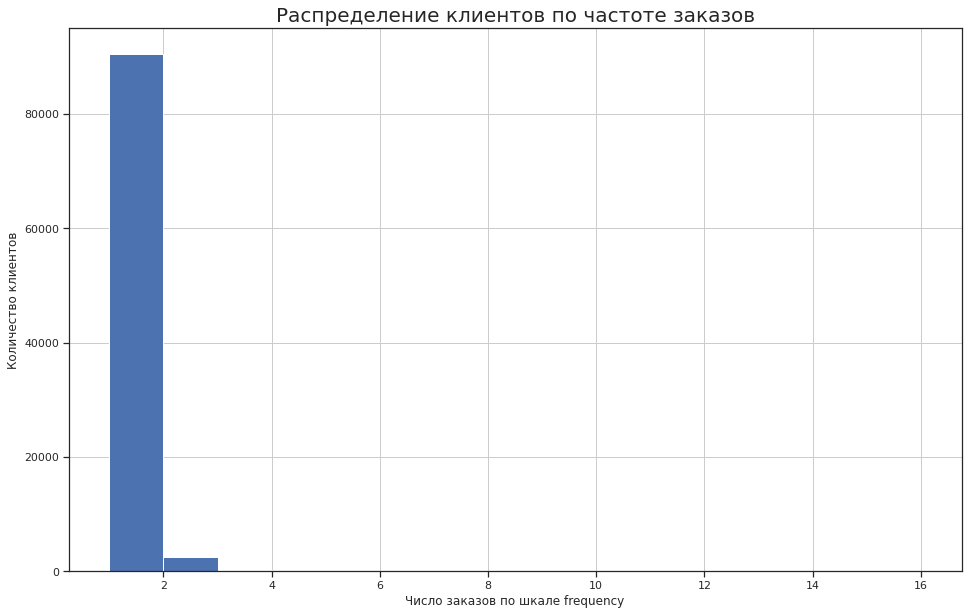

In [86]:
# строим график
plt.figure(figsize=(16,10))
rfm_df['frequency'].hist(bins=range(1, rfm_df['frequency'].max()+2))
plt.title('Распределение клиентов по частоте заказов', fontsize=20)
plt.xlabel('Число заказов по шкале frequency')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

Метрика, отражающая вовлечённость клиента в продолжение использования продукта — частота покупок (frequency), рассчитанная в рамках RFM-анализа.
Анализ показал, средняя частота заказов примерно равна **1**, что говорит об очень низком уровне вовлеченности клиента нашим продуктом. Клиенты, чьи ожидания от использования сервиса не оправдались, не заинтересованы в дальнейшем его использовать. Более того, при расчете метрики объема аудитории, которой продукт доставляет ценность, мы получили только **3% пользователей** совершают повторные заказы, что подтверждает выводы RFM-анализа.

### 5. Метрика денежной вовлеченности

In [87]:
print(f"Минимальный чек {rfm_df['monetary'].min()}")
print(f"Среднее значение {rfm_df['monetary'].mean().round(2)}")
print(f"Максимальный чек {rfm_df['monetary'].quantile(0.99).max()}") #избавились от редких и аномальных больших сумм

Минимальный чек 0.85
Среднее значение 141.62
Максимальный чек 1004.99


(0.0, 1004.99)

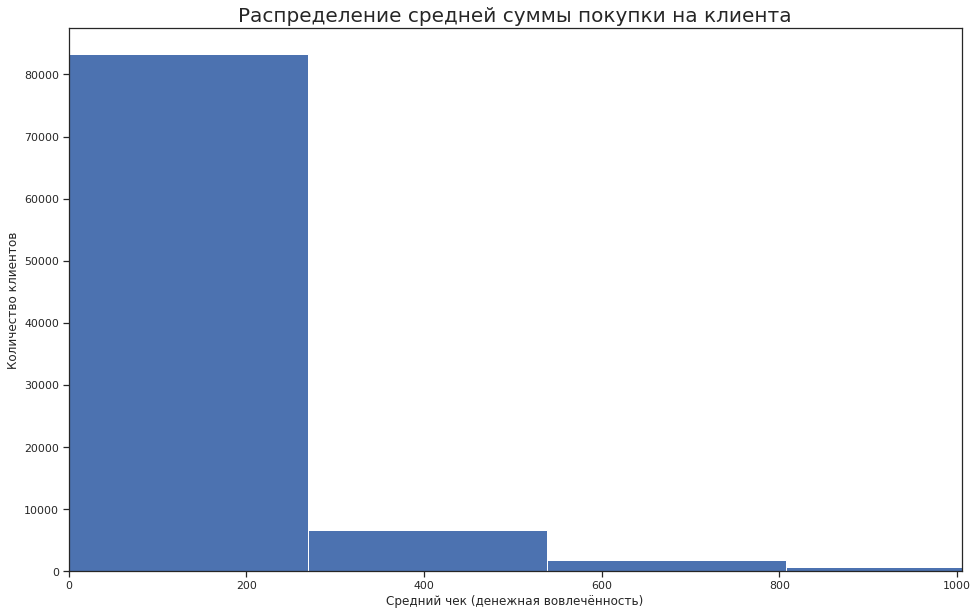

In [88]:
# Строим график
plt.figure(figsize=(16,10))
plt.hist(rfm_df['monetary'], bins=50)
plt.title('Распределение средней суммы покупки на клиента', fontsize = 20)
plt.xlabel('Средний чек (денежная вовлечённость)')
plt.ylabel('Количество клиентов')
plt.xlim(0, rfm_df['monetary'].quantile(0.99))  # избавляемся от редких аномально больших сум


В качестве измерения метрики денежной вовлеченности мы взяли шкалу Мonetary из RFM-анализа. После исключения аномально высоких значений из визуализации стало очевидно, что основная масса клиентов тратит меньше 200, при этом среднее значение составляет 141.62, а максимальное — 1004.99. Такой разброс и значительное смещение в сторону низких значений свидетельствуют о низкой денежной вовлечённости большинства клиентов

## Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.
Посмотрев с продактом на когортный анализ и метрики, вы решили, что нужно изменить продукт. Метрики необходимо срочно повышать. Вместе с командой вы сформулировали 3 гипотезы, в которые вы верите. По каждой гипотезе команда заполнила показатели по **Ease, Confidence**. Вам нужно заполнить самый важный показатель — **Impact**. Для этого вам требуется:

Выбрать одну из трёх основных гипотез с помощью фреймворка ICE, которые были сформированы продактом и, кажется, должны улучшить пользовательский опыт в маркетплейсе.

Для расчёта Impact возьмите данные с июня 2017 года. Считайте, что конверсия в повторный заказ равна величине медианного retention 1-го месяца (см. пункт 1 проекта).

### Гипотеза 1
Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

In [89]:
# фильтруем данные по выбранной точке отчета и отменам
hip_1 = full_df.query("order_status == 'canceled' & order_purchase_timestamp >= '2017-06-01'")

In [90]:
# исключаем повторяющиеся заказы
hip_1 = hip_1.groupby('customer_id').agg(num_of_orders = ('order_id', 'nunique')).reset_index()

In [91]:
# считаем количество отмененных заказов
impact_1 = hip_1.shape[0]
impact_1

373

In [92]:
# присваиваем балл согласно шкале Impact
impact_1_score = 4

## Гипотеза 2
Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 

In [93]:
# фильтруем данные по выбранной точке отчета и доставленным заказам
hip_2 = full_df.query('order_purchase_timestamp >= "2017-06-01" & order_status =="delivered"')

In [94]:
# фильтруем заказы с опозданиями
hip_2 = hip_2.query('order_delivered_customer_date > order_estimated_delivery_date')

In [95]:
# исключаем повторяющиеся заказы
hip_2 = hip_2.groupby('customer_id').agg(num_of_orders = ('order_id', 'nunique')).reset_index()

In [96]:
# умножаем конверсию в повторные заказы на количество пользователей
impact_2 = first_month_median * hip_2.shape[0]
impact_2

25.5325

In [97]:
# присваиваем балл согласно шкале Impact
impact_2_score = 1

### Гипотеза 3
Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.

In [98]:
# фильтруем данные по выбранной точке отчета и доставленным заказам
hip_3 = full_df.query('order_purchase_timestamp >= "2017-06-01" & order_status =="delivered"')

In [99]:
# исключаем повторяющиеся заказы
hip_3 = hip_3.groupby('customer_id').agg(num_of_orders = ('order_id', 'nunique')).reset_index()

In [100]:
# фильтруем клиентов, которые совершили только один заказ
hip_3 = hip_3.query('num_of_orders == 1')

In [101]:
# умножаем конверсию в повторные заказы на количество пользователей
impact_3 = hip_3.shape[0]*first_month_median
impact_3

298.9455

In [102]:
# присваиваем балл согласно шкале Impact
impact_3_score = 3

In [103]:
# создаем df с баллами ICE
data_ice = {
     'Гипотезы': ['Гипотеза 1', 'Гипотеза 2', 'Гипотеза 3'],
     'Impact': [impact_1_score, impact_2_score, impact_3_score],
     'Confidence': [8,10,5],
     'Ease': [6,4,9]
}

In [104]:
ICE = pd.DataFrame(data_ice)

In [105]:
# считаем ICE по всем гипотезам
ICE['ICE'] = ICE['Impact']*ICE['Confidence']*ICE['Ease']

In [106]:
ICE

,Гипотезы,Impact,Confidence,Ease,ICE
0,Гипотеза 1,4,8,6,192
1,Гипотеза 2,1,10,4,40
2,Гипотеза 3,3,5,9,135


Согласно анализу приоритетности гипотез по фреймворку ICE, наибольшее количество баллов набрала **первая гипотеза**. Следовательно, именно с неё рекомендуется начать работу по улучшению метрик.

## Задача 5. Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.

После предыдущего исследования у вас появилась гипотеза, которую можно реализовать для значительного улучшения метрик компании. Вы предложили использовать A/B-тестирование для проверки её эффективности.

### Продакт попросил вас:

- Сформулировать метрики, на которые должна повлиять выбранная вами гипотеза.
- Сформулировать хотя бы по одной метрике в категории: целевые, прокси, guardrail и объяснить свой выбор.

- **Целевая:**: Метрика, которая напрямую отражает влияние гипотезы, это доля успешно доставленных заказов. Если проблемой отмены заказов был баг в системе, то при его устранении, доля доставленных заказов должна увеличиться
- **Proxy-метрика** - среднее время, необходимое на подтверждение заказа. Если баг замедлял процесс обработки заказа, то после его устранения, время между созданием заказа и его подтверждением должно уменьшиться
- **Guardrail-метрика** - доля заказов, которые были созданы, но не прошли стадию оплаты. Возможно, исправляя баг в одном месте, можно ненамеренно нарушить работу другого этапа процесс обработки заказа.

## Задача 6. Вот и подошёл к концу ваш первый этап работы аналитиком в команде маркетплейса. Теперь необходимо поделиться результатами проведённой работы с компанией.

1. Сформулируйте выводы о проделанной работе и подготовьте небольшой, но логичный и содержательный отчет для Пети.
Изложите его в комментариях в ipynb-файле или описании мердж-реквеста.

2. Структура должна выглядеть следующим образом:
   - формализация проблемы продукта: что не так и как вы это поняли?

   - общие выводы по итогу исследования на основе результатов, полученных в заданиях 1-5;

   - рекомендации по продукту.

### Формализация проблемы продукта

На основании когортного анализа и изучения ключевых метрик выявлены существенные проблемы в пользовательском опыте. Retention по всем когортам не превышает 1%, а доля повторных заказов составляет всего 3%. Это свидетельствует о том, что маркетплейс не обладает достаточной ценностью для пользователей и не соответствует их ожиданиям.

Также, в ходе анализа, было установлено, что среднее время подтверждения заказа имеет высокий показатель в 10,5 часов, а доля задержек составляет 8,1% со средним временем опоздания примерно на 10 дней. Все это указывает на значительные соби в работе системы маркетплейса, что, в свою очередь, сильно подрывает доверие и снижает лояльность клиентов

Одной из возможных причин сбоя работы в системе является наличие бага, который автоматически отменяет созданные заказы 

### Общие выводы
- **Повторные заказы совершают единицы.**
Менее 1% пользователей возвращаются на платформу, и только 3% оформляют повторные покупки. Это сигнализирует о слабом пользовательском опыте и отсутствии ценности продукта для пользователей после первого заказа.

- **Доверие к платформе подрывается задержками и долгой обработкой заказов.**
Подтверждение заказа в среднем занимает 10,5 часов. При этом 8% заказов приходят с задержкой, среднее время которой составляет примерно 10 дней от предполагаемой даты доставки. Это является критичным показателем. Пользователи не готовы ждать и не уверены в надежности сервиса.

- **Большинство клиентов делают небольшие заказы.**
Средний чек — 141.62, тогда как максимум по данным — 1004.99, а минимум - 0.85 (возможно, это ошибка. Следует уточнить). При этом заказы на аномально высокие суммы были исключены из анализа для объективности. Пользователи не готовы тратить большие суммы на нашем маркетплейсе. Однако данный факт требует дополнительной проверки и анализа. В рамках имеющихся данных мы не обладаем информацией о сегменте продуктов, которые предлагает платформа. Возможно, сам ассортимент ориентирован преимущественно на товары среднего ценового сегмента.

- **Приоритизация гипотез по ICE-фреймворку.**
В ходе анализа были выдвинуты три гипотезы, которые предположительно могут улучшить метрики продукта. Он показал, что в первую очередь необходимо обратить внимание на исправление багов в системе работы платформы, приводящих к отменам заказов. При ее реализации предполагается, что мы сможем полностью избавиться от системных отмен заказов. Для проверки этой гипотезы были выбраны следующие метрики:
   - **Целевая**: Доля успешно доставленных заказов;
   - **Proxy-метрика**: среднее время, необходимое на подтверждение заказа;
   - **Guardrail-метрика** - доля заказов, которые были созданы, но не прошли стадию оплаты


### Рекомендации по продукту
- **Сфокусироваться на первом опыте клиента**. Учитывая низкий retention и маленькую долю повторных заказов, важно усилить ценность первого взаимодействия с продуктом. Например, после получения заказа, попросить оценить качество сервиса. Если клиент остался недоволен работой маркетплейса, предложить ему gift-карту на сумму его заказа для использования при следующей покупке. Это поможет вернуть доверие и стимулировать повторный заказ. Важно также обеспечить проверку ситуации: при необходимости можно подключать сотрудников поддержки, чтобы понять реальную причину негатива и исключить злоупотребления.
- **Выявить и устранить причину долгого время подтверждения заказов.** На данный момент подтверждение заказа в среднем занимает более 10 часов — это высокий показатель для онлайн-платформы. акая задержка может вызывать у клиентов чувство тревожности и ощущение нестабильности сервиса, особенно если деньги уже списаны, а подтверждения всё нет. В результате это снижает желание совершать повторную покупку.
- **Проанализировать причины задержки товаров**. Несмотря на то, что доля задержек заказов составляет 8%, среднее время составляет почти 10 дней. Необходимо разобраться, на каких именно этапах возникают сбои. Дополнительно можно внедрить коммуникации по e-mail и SMS, информируя клиентов о статусе доставки. В случае задержек — заранее извиняться и предлагать скидку на следующую покупку в качестве компенсации. Это поможет сгладить негатив и повысить вероятность повторного заказа.
- **Использовать A/B тестирование для проверки выбранной гипотезу по ICE-фреймворку**. Реализация этой гипотезы направлена на устранение системных ошибок, приводящих к отменам заказов. A/B тест поможет объективно оценить её влияние на ключева метрики — долю успешно доставленных заказов, среднее время подтверждения заказов и доля созданных товаров, которые не были оплачены.Такой подход позволит минимизировать риски и принять обоснованное решение о дальнейшем внедрении изменений.
- **Детальнее изучить причины низкого среднего чека.** Необходимо провести дополнительный анализ ассортимента и поведения пользователей, чтобы понять, связано ли это с недоверием клиентов или с особенностями товарного предложения. Это поможет определить пути для увеличения среднего чека и общей выручки.